# ARVORE DE DESCISAO
- E um metodo de aprendizado supervisionado nao perimetrico usado pra classificaçao e regressao.

- Cria um modelo que proveja o valor de uma variável-alvo aprendendo regras de decisão simples inferidas a partir das características dos dados

- Uma árvore pode ser vista como uma aproximação de constantes por partes.

- No exemplo abaixo, as árvores de decisão aprendem com os dados para aproximar uma curva senoidal com um conjunto de regras de decisão do tipo "se-então-senão". Quanto mais profunda a árvore, mais complexas as regras de decisão e mais ajustado o modelo.


![arvore de regressao.png](<attachment:arvore de regressao.png>)
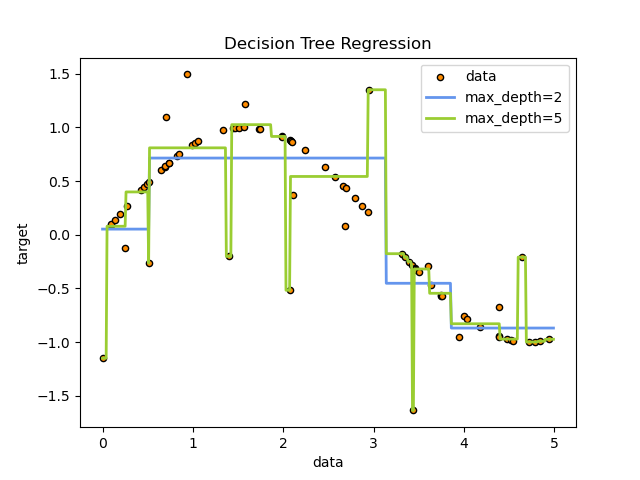

# Algumas vantagens das árvores de decisão são:

- Simples de entender e interpretar. As árvores podem ser visualizadas.
- Requer pouca preparação de dados. Outras técnicas frequentemente exigem normalização de dados, criação de variáveis ​​fictícias e remoção de valores em branco. Algumas combinações de árvores e algoritmos suportam valores ausentes .
-O custo de uso da árvore (ou seja, previsão de dados) é logarítmico no número de pontos de dados usados ​​para treinar a árvore.
- Capaz de lidar com dados numéricos e categóricos. No entanto, a implementação do scikit-learn não suporta variáveis ​​categóricas por enquanto. Outras técnicas geralmente são especializadas na análise de conjuntos de dados que possuem apenas um tipo de variável. Consulte algoritmos para obter mais informações.
- Capaz de lidar com problemas de múltiplas saídas.
- Utiliza um modelo de caixa branca. Se uma determinada situação for observável em um modelo, a explicação para a condição é facilmente explicada pela lógica booleana. Em contraste, em um modelo de caixa preta (por exemplo, em uma rede neural artificial), os resultados podem ser mais difíceis de interpretar.
- É possível validar um modelo por meio de testes estatísticos. Isso permite avaliar a confiabilidade do modelo.
- Apresenta bom desempenho mesmo que suas suposições sejam de alguma forma violadas pelo modelo verdadeiro a partir do qual os dados foram gerados.

## As desvantagens das árvores de decisão incluem:

- Aprendizes de árvores de decisão podem criar árvores excessivamente complexas que não generalizam bem os dados. Isso é chamado de sobreajuste. Mecanismos como poda, definição do número mínimo de amostras necessárias em um nó folha ou definição da profundidade máxima da árvore são necessários para evitar esse problema.
-Árvores de decisão podem ser instáveis, pois pequenas variações nos dados podem resultar na geração de uma árvore completamente diferente. Esse problema é atenuado pelo uso de árvores de decisão dentro de um conjunto.
-As previsões de árvores de decisão não são suaves nem contínuas, mas sim aproximações constantes por partes, como visto na figura acima. Portanto, não são boas para extrapolação.
- O problema de aprendizado de uma árvore de decisão ótima é conhecido por ser NP-completo sob vários aspectos de otimalidade e até mesmo para conceitos simples. Consequentemente, algoritmos práticos de aprendizado de árvores de decisão baseiam-se em algoritmos heurísticos, como o algoritmo guloso, em que decisões localmente ótimas são tomadas em cada nó. Tais algoritmos não garantem o retorno da árvore de decisão globalmente ótima. Isso pode ser mitigado treinando múltiplas árvores em um aprendiz de conjunto, onde as características e amostras são amostradas aleatoriamente com substituição.
- Há conceitos que são difíceis de aprender porque as árvores de decisão não os expressam facilmente, como XOR, paridade ou problemas de multiplexador.
- Aprendizes de árvores de decisão criam árvores tendenciosas se algumas classes dominarem. Portanto, recomenda-se balancear o conjunto de dados antes de ajustá-lo à árvore de decisão.

In [27]:
%pip install openpyxl -q
%pip install scikit-learn -q
import pandas as pd

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




df = pd.read_excel('dados.xlsx')

In [29]:
df.head()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
0,LABORGUINI,3.0,12,1200,700,AUTOMATICO,BRASIL
1,LABORGUINI,3.0,12,1200,700,AUTOMATICO,EUA
2,LABORGUINI,3.0,12,1200,700,AUTOMATICO,ESPANHA
3,FERRARI,3.0,12,1400,640,AUTOMATICO,CANADA
4,ASTON MARTIN,3.5,10,1600,620,AUTOMATICO,INGLATERRA


In [30]:
df.describe()

,KM-LITRO,CILINDROS,PESO(KG),CAVALOS
count,984.000000,986.000000,986.000000,986.000000
mean,8.209553,6.115619,1959.432049,262.622718
std,3.718411,2.764683,459.769620,209.544669
min,3.000000,3.000000,1200.000000,116.000000
25%,4.500000,4.000000,1700.000000,118.000000
50%,8.000000,4.000000,1700.000000,118.000000
75%,11.000000,8.000000,2300.000000,340.000000
max,14.000000,12.000000,3000.000000,1800.000000


In [31]:
df.shape

(986, 7)

In [32]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target



In [33]:

print("Nulos:", df.isnull().sum())
df = df.dropna()




Nulos: sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [34]:
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(df.drop('target', axis=1))



In [35]:
df_normalizado = pd.DataFrame(X_normalizado, columns=iris.feature_names)
df_normalizado['target'] = df['target']


In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_normalizado.drop('target', axis=1), df_normalizado['target'], test_size=0.2, random_state=42)



In [38]:
data = {
    "MODELO": ["LABORGUINI", "LABORGUINI", "LABORGUINI", "FERRARI", "ASTON MARTIN"],
    "KM-LITRO": [3.0, 3.0, 3.0, 3.0, 3.5],
    "CILINDROS": [12, 12, 12, 12, 10],
    "PESO(KG)": [1200, 1200, 1200, 1400, 1600],
    "CAVALOS": [700, 700, 700, 640, 620],
    "TRANSMISSAO": ["AUTOMATICO", "AUTOMATICO", "AUTOMATICO", "AUTOMATICO", "AUTOMATICO"],
    "PAIS": ["BRASIL", "EUA", "ESPANHA", "CANADA", "INGLATERRA"]
}

df.novo = pd.DataFrame(data)


C:\Users\jesie\AppData\Local\Temp\ipykernel_8116\3974872849.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.novo = pd.DataFrame(data)


In [39]:
paises = df["PAIS"].unique()
df["PAIS"] = df["PAIS"].map({pais: i for i, pais in enumerate(paises)})



In [41]:
transmissoes = df["TRANSMISSAO"].unique()
df["TRANSMISSAO"] = df["TRANSMISSAO"].map({transmissao: i for i, transmissao in enumerate(transmissoes)})

modelos = df["MODELO"].unique()
df["MODELO"] = df["MODELO"].map({modelo: i for i, modelo in enumerate(modelos)})


In [42]:
X = df[["KM-LITRO", "CILINDROS", "PESO(KG)", "CAVALOS", "TRANSMISSAO", "MODELO"]]
y = df["PAIS"]


In [43]:
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.2, random_state=42)

In [45]:
clf = DecisionTreeClassifier(random_state=42)



In [46]:
clf.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [47]:
y_pred = clf.predict(X_test)



In [48]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))
print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))



Acurácia: 0.0
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Matriz de confusão:
[[0 0]
 [1 0]]


c:\Users\jesie\Desktop\Curso-IA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\jesie\Desktop\Curso-IA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\jesie\Desktop\Curso-IA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0

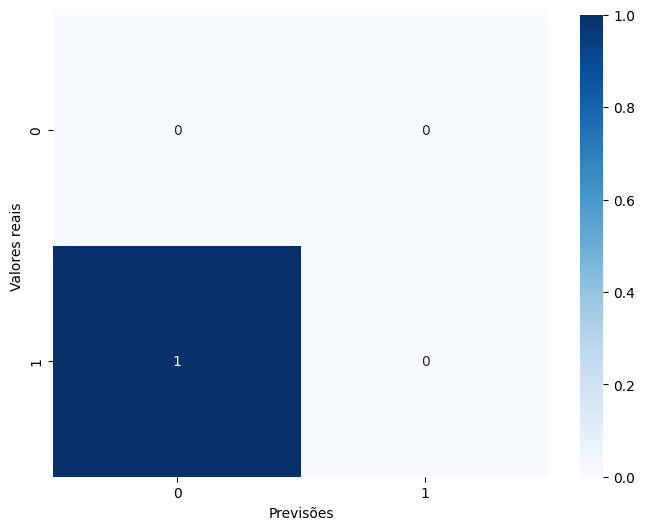

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel("Previsões")
plt.ylabel("Valores reais")
plt.show()


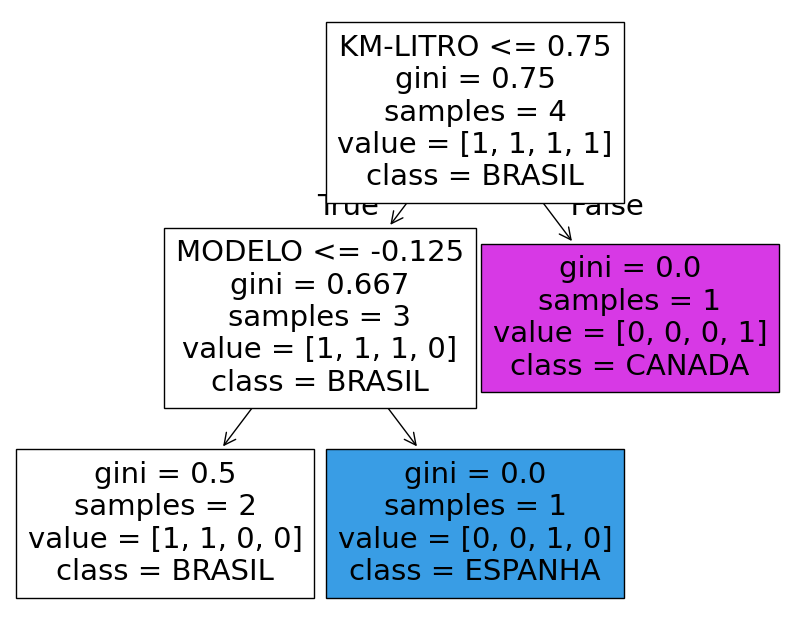

In [50]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=X.columns, class_names=paises, filled=True)
plt.show()
